# Exploratory Data Analysis on  IPL ( 2008 - 2019)

Talk About EDA

1. talk about the datasets(what it contains, how it will be useful).
2. Calculating missing data percentage value and cleaning it.
3. Total number of match played in each seasons.
4. No. of tosses won by each team
5. Toss decision(field first or bat first) in each seasons.
6. We see the team won toss lead to winning matches.
7. Which team has won most IPL trophy between(2008-2019)
8. Total number of match played in each seasons by each team.
9. Total number of win and win % by each team.
10. No. of wins at different Venues by a team.( I had only done for MI but, you can do  for every team)
11. Maximum Man of the Match Awards by a player.
12. Top 5 teams with most wins after batting first.
13. Top 5 teams with most wins after batting second.
14. Number of matches played in each city.
15. Who has umpired most?



## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ipl = pd.read_csv('matches.csv',encoding = "utf-8")

In [3]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl.shape

(756, 18)

In [5]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

The column date has datatype of objec. Changing to datetime data type.

In [7]:
ipl['date']= pd.to_datetime(ipl['date'])

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [9]:
matches= ipl.isnull()
matches.head(20)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


'False' means the value is not missing and 'True' means the value is missing

## Counting missing value in each column

In [10]:
for column in matches.columns.values.tolist():
    print(column)
    print(matches[column].value_counts())
    print(" ")

id
False    756
Name: id, dtype: int64
 
season
False    756
Name: season, dtype: int64
 
city
False    749
True       7
Name: city, dtype: int64
 
date
False    756
Name: date, dtype: int64
 
team1
False    756
Name: team1, dtype: int64
 
team2
False    756
Name: team2, dtype: int64
 
toss_winner
False    756
Name: toss_winner, dtype: int64
 
toss_decision
False    756
Name: toss_decision, dtype: int64
 
result
False    756
Name: result, dtype: int64
 
dl_applied
False    756
Name: dl_applied, dtype: int64
 
winner
False    752
True       4
Name: winner, dtype: int64
 
win_by_runs
False    756
Name: win_by_runs, dtype: int64
 
win_by_wickets
False    756
Name: win_by_wickets, dtype: int64
 
player_of_match
False    752
True       4
Name: player_of_match, dtype: int64
 
venue
False    756
Name: venue, dtype: int64
 
umpire1
False    754
True       2
Name: umpire1, dtype: int64
 
umpire2
False    754
True       2
Name: umpire2, dtype: int64
 
umpire3
True     637
False    119
Name: umpi

In [11]:
missing_percentages= ipl.isna().sum().sort_values(ascending=False) /len(ipl) 
missing_percentages

umpire3            0.842593
city               0.009259
winner             0.005291
player_of_match    0.005291
umpire2            0.002646
umpire1            0.002646
venue              0.000000
win_by_wickets     0.000000
win_by_runs        0.000000
id                 0.000000
season             0.000000
result             0.000000
toss_decision      0.000000
toss_winner        0.000000
team2              0.000000
team1              0.000000
date               0.000000
dl_applied         0.000000
dtype: float64

In [12]:
type(missing_percentages)

pandas.core.series.Series

<AxesSubplot:>

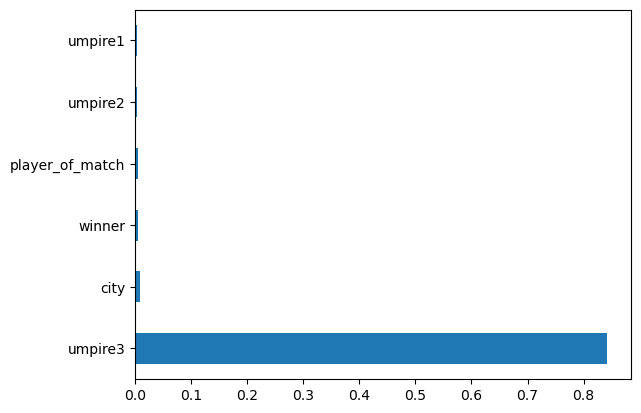

In [13]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

## Remove upmire3 column as too many missing value and for other column missing values are deleted

In [14]:
ipl.__delitem__('umpire3')

In [15]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [17]:
ipl.dropna( subset=["city", "winner", "player_of_match", "umpire1", "umpire2"], inplace=True)

In [28]:
ipl.shape

(743, 17)

In [18]:
ipl.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

you can see there are no null values or empty space

In [20]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Exploratory Visualization And Analysis


columns we analyze

1. Player_of_match
2. result
3. toss_winner
4. win_by_runs
5. winner
6. win_by_wickets
7. season
8. city
9. team
10. toss_decision
11. venue
12. umpire1 and umpire2


In [48]:
ipl['season'] = pd.DatetimeIndex(ipl['date']).year
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [49]:
match_per_season=ipl.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='PuBu')

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,72
4,2012,74
5,2013,76
6,2014,53
7,2015,57
8,2016,60
9,2017,58


In [65]:
colors = ['turquoise',] * 13
colors[5] = 'crimson'

fig=px.bar(data_frame=match_per_season,x=match_per_season.season,y=match_per_season.matches,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="Number of matches played in different seasons ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Each season, almost 60 matches were played. However, we see a spike in the number of matches from 2011 to 2013. This is because two new franchises, the Pune Warriors and Kochi Tuskers Kerala, were introduced, increasing the number of teams to 10.

In [53]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [54]:
toss=ipl['toss_winner'].value_counts()
colors = ['turquoise',] * 15
colors[0] = 'crimson'
fig=px.bar( y=toss,x=toss.index,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="No. of tosses won by each team",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Mumbai Indians have won the most tosses, followed by Kolkata Knight Riders.

In [57]:
import numpy as np
import plotly.graph_objs as go

temp_series = ipl.toss_decision.value_counts()
labels = (np.array(temp_series.index))
values = (np.array((temp_series / temp_series.sum())*100))
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Toss decision percentage",
                  titlefont={'size': 30},
                  )
fig.show()

After winning the toss, team tends to field first

In [60]:
fig=px.histogram(data_frame=ipl,x='season',color='toss_decision',color_discrete_sequence=colors,barmode='group')
fig.update_layout(title="Toss decision in different seasons",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1)
fig.show()

Most of the times, teams decide to field first, except in season 2009,2010,2013 where teams decided to bat first mostly.
Since 2014, teams have overwhelmingly chosen to bat second. Especially since 2016, teams have chosen to field for more than 80% of the times.

In [67]:
labels =["Yes",'No']
values = ipl['winner'].value_counts()
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Winning toss implies winning macthes?",
                  titlefont={'size': 30},
                  )
fig.show()

In [68]:
ipl['result'].value_counts()

normal    734
tie         9
Name: result, dtype: int64

In [69]:
winning_teams =ipl[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

In [70]:
winners_of_IPL.value_counts().index

MultiIndex([(       'Mumbai Indians',),
            (  'Chennai Super Kings',),
            ('Kolkata Knight Riders',),
            (      'Deccan Chargers',),
            (     'Rajasthan Royals',),
            (  'Sunrisers Hyderabad',)],
           names=['team'])

In [74]:
colors = ['turquoise',] * 6
colors[0] = 'crimson'
fig=px.bar( y=winners_of_IPL['team'].value_counts(),x=winners_of_IPL['team'].value_counts().index,labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Winners of IPL",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Mumbai Indians won IPL for 4 times, followed by Chennai Super Kings for 3 times and Kolkata Knight Riders for 2 times.

In [76]:
matches_played_byteams=pd.concat([ipl['team1'],ipl['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Team Name,Total Matches played
0,Mumbai Indians,184
1,Kolkata Knight Riders,177
2,Kings XI Punjab,175
3,Royal Challengers Bangalore,174
4,Chennai Super Kings,162
5,Delhi Daredevils,156
6,Rajasthan Royals,144
7,Sunrisers Hyderabad,105
8,Deccan Chargers,75
9,Pune Warriors,45


In [78]:
wins=pd.DataFrame(ipl['winner'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,98
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,82
4,Kings XI Punjab,81
5,Rajasthan Royals,75
6,Delhi Daredevils,66
7,Sunrisers Hyderabad,56
8,Deccan Chargers,29
9,Gujarat Lions,13


In [79]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu',subset=['% Win'])

,Team Name,Total Matches played,Wins,% Win
0,Rising Pune Supergiant,16,10,62.500000
1,Chennai Super Kings,162,98,60.493827
2,Delhi Capitals,15,9,60.000000
3,Mumbai Indians,184,109,59.239130
4,Sunrisers Hyderabad,105,56,53.333333
5,Rajasthan Royals,144,75,52.083333
6,Kolkata Knight Riders,177,92,51.977401
7,Royal Challengers Bangalore,174,82,47.126437
8,Kings XI Punjab,175,81,46.285714
9,Gujarat Lions,30,13,43.333333


In [80]:
colors = ['turquoise',] * 15
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Total Matches played'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total number of matches played",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [81]:
colors = ['turquoise',] * 15
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Wins'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total Win by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [82]:
colors = ['turquoise',] * 15
colors[-4] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['% Win'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Win % by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

Rising Pune Supergiants have the highest win % of 62.50, followed by Chennai Super kings, Delhi Capitals and Mumbai Indians.
This is largely due to the fact that they had played really few matches.

In [83]:
def lucky(ipl,team_name):
    return ipl[ipl['winner']==team_name]['venue'].value_counts().nlargest(10)

In [84]:
mi=lucky(ipl,'Mumbai Indians')
values = mi
labels=mi.index
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Wins at different Venues for MI:",
                  titlefont={'size': 30},
                  )
fig.show()

In [101]:
toss=ipl['player_of_match'].value_counts()[0:10]
colors = ['turquoise',] * 10
colors[0] = 'crimson'
fig=px.bar( y=toss,x=toss.index,labels=dict(x="Player_Name",y="Count"),)
fig.update_layout(title="Maximum Man of the Match Awards",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [92]:
#Extracting the records where a team won batting first
batting_first=ipl[ipl['win_by_runs']!=0]

In [93]:
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin


In [94]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            51
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    34
Sunrisers Hyderabad            28
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

In [114]:
first=batting_first['winner'].value_counts()[0:5]
colors = ['turquoise',] * 10
colors[0] = 'crimson'
fig=px.bar( y=first,x=first.index,labels=dict(x="Team",y="Count"),)
fig.update_layout(title="Top 5 teams with most wins after batting first",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [103]:
#extracting those records where a team has won after batting second
batting_second=ipl[ipl['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


In [115]:
second=batting_second['winner'].value_counts()[0:5]
colors = ['turquoise',] * 10
colors[0] = 'crimson'
fig=px.bar( y=second,x=second.index,labels=dict(x="Team",y="Count"),)
fig.update_layout(title="Top 5 teams with most wins after batting second",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [117]:
city=ipl['city'].value_counts()[0:5]
colors = ['turquoise',] * 10
colors[0] = 'crimson'
fig=px.bar( y=city,x=city.index,labels=dict(x="City",y="Count"),)
fig.update_layout(title="Number of matches played in each city",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [113]:
ump=pd.concat([ipl['umpire1'],ipl['umpire2']])
ump=ump.value_counts()
umps=ump.to_frame().reset_index()
ump.head(10)

S Ravi             104
HDPK Dharmasena     84
C Shamshuddin       73
AK Chaudhary        57
SJA Taufel          55
M Erasmus           51
Asad Rauf           51
Nitin Menon         42
BR Doctrove         42
CK Nandan           41
dtype: int64